# Electronic Structure
Here code examples for electron band structure, density of states (DOS) are given.

## 'read_electron_band()' and 'read_electron_dos()' methods

Both methods are defined in the `crystal_io.Properties_output` class, which read formatted output files generated by CRYSTAL and return to `electronics.ElectronBand` and `electronics.ElectronDOS` classes. Both methods accept Crgra2006 (fort.25) and Xmgrace files (BAND.DAT, DOSS.DAT).

The standard output is not required for plotting, the geometry information is required during analysis. The output of properties calculation can be specified during object instantiation.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

mgoband = Properties_output('band_mgo.outp').read_electron_band('band_mgo.BAND')

print('MgO energy unit = {}'.format(mgoband.unit))
print('MgO Fermi energy = {:.2f}'.format(mgoband.efermi))
print('MgO reciprocal lattice:')
print(mgoband.reciprocal_latt)

MgO energy unit = eV
MgO Fermi energy = -4.14
MgO reciprocal lattice:
[[-1.48996569  1.48996569  1.48996569]
 [ 1.48996569 -1.48996569  1.48996569]
 [ 1.48996569  1.48996569 -1.48996569]]


Currently no geometry information is added to the `ElectronDOS` object.

In [2]:
mgodoss = Properties_output().read_electron_dos('doss_mgo.DOSS')

print('MgO energy unit = {}'.format(mgodoss.unit))
print('MgO Fermi energy = {:.2f}'.format(mgodoss.efermi))
print('MgO DOS projections = {}'.format(len(mgodoss.doss)))

MgO energy unit = eV
MgO Fermi energy = -4.14
MgO DOS projections = 3


## 'electronics' module
The electronics module includes object-oriented methods for data analysis and quick plotting.

### 'ElectronBand' object
The user can instantiate a `ElectronBand` object by directly calling the `from_file` class method.

In [3]:
from CRYSTALpytools.electronics import ElectronBand

mgoband = ElectronBand.from_file('band_mgo.BAND', 'band_mgo.outp')

Basic properties can be analyzed with its methods.

In [4]:
mgoband.get_bandgap()
print('Band gap of MgO = {:.2f} {}'.format(mgoband.gap, mgoband.unit))
print('CBM to Fermi level = {:.2f}'.format(mgoband.cbm))
print('1D VBM position = {:.2f}; CBM position = {:.2f}'.format(
    mgoband.gap_pos[0], mgoband.gap_pos[1]))

Band gap of MgO = 7.12 eV
CBM to Fermi level = 7.12
1D VBM position = 0.00; CBM position = 0.00


**When geometry information is available**, the user can convert the `ElectronBand` object into the [pymatgen `BandStructureSymmLine` object](https://pymatgen.org/pymatgen.electronic_structure.html#pymatgen.electronic_structure.bandstructure.BandStructureSymmLine) for further analysis.

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

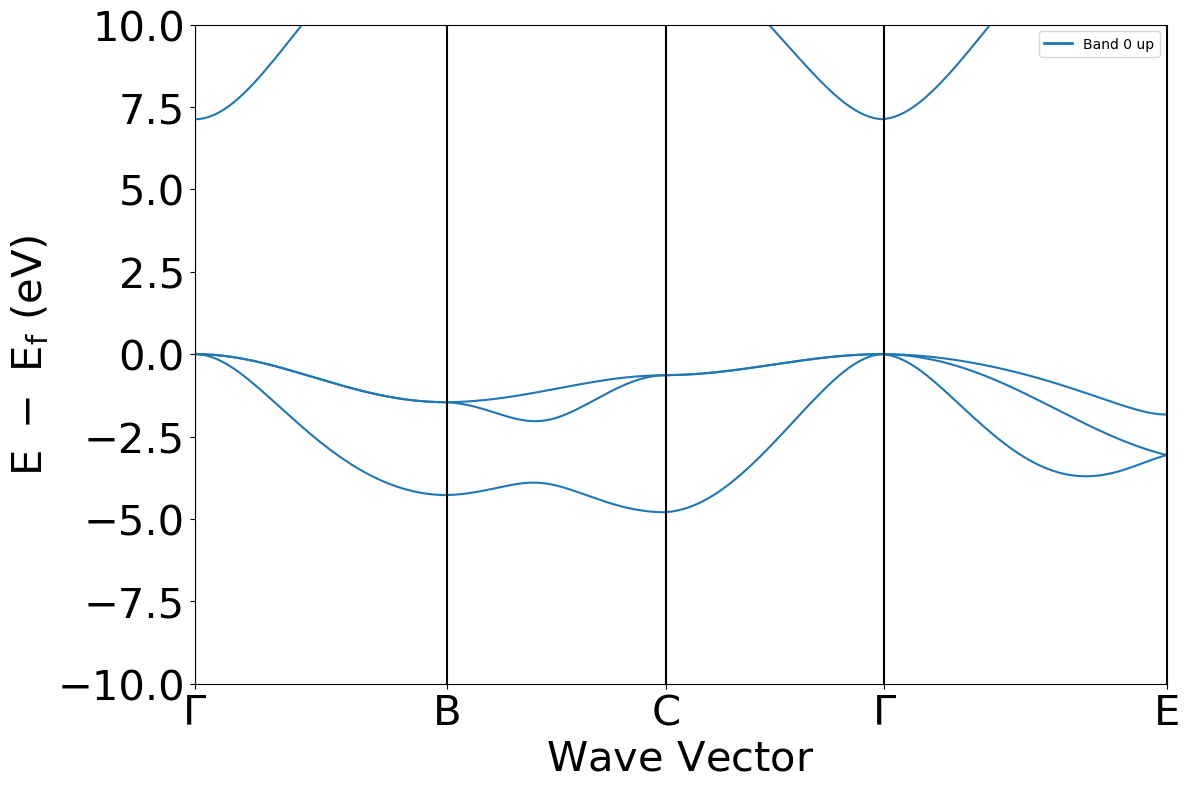

In [5]:
from pymatgen.electronic_structure.plotter import BSPlotter

pmgband = mgoband.to_pmg(labels=[r'$\Gamma$', 'B', 'C', r'$\Gamma$', 'E'])
bsplot = BSPlotter(pmgband)
bsplot.get_plot(ylim=(-10, 10), zero_to_efermi=True)

Of course the user can also do a quick plot by calling the `plot` method. It also allows for finer adjustments of band structure plot. Here the band structure of MgO is replotted in Hartree unit with energy aligned to vacuum. 

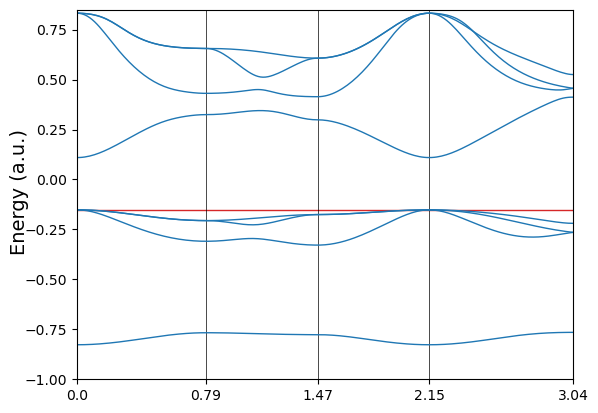

In [6]:
fig = mgoband.plot(unit='a.u.',  energy_range=[-1.0, 0.85],
                   fermi_color='tab:red', fermi_level=mgoband.efermi,)

### 'ElectronDOS' object

Similarly, the `ElectronDOS` object can be instantiated and plotted.

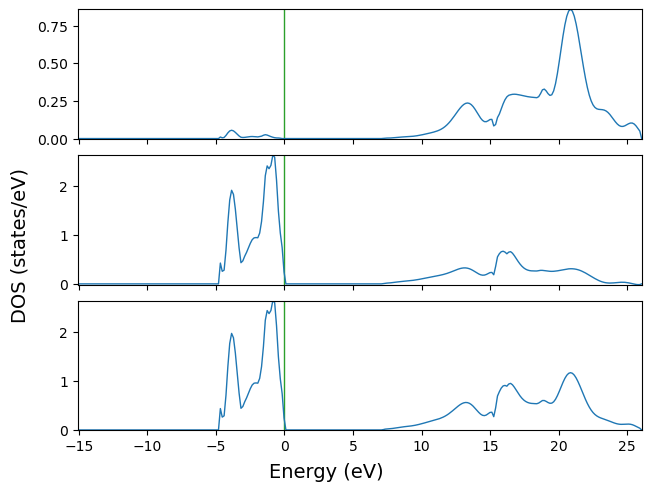

In [7]:
from CRYSTALpytools.electronics import ElectronDOS

mgodoss = ElectronDOS.from_file('doss_mgo.DOSS')
fig = mgodoss.plot(sharey=False)

### 'ElectronBandDOS' object

This is an object combining `ElectronBand` and `ElectronDOS`. It can be instantiated by 2 files (band first) or a single 'fort.25' file with both band and DOS data.

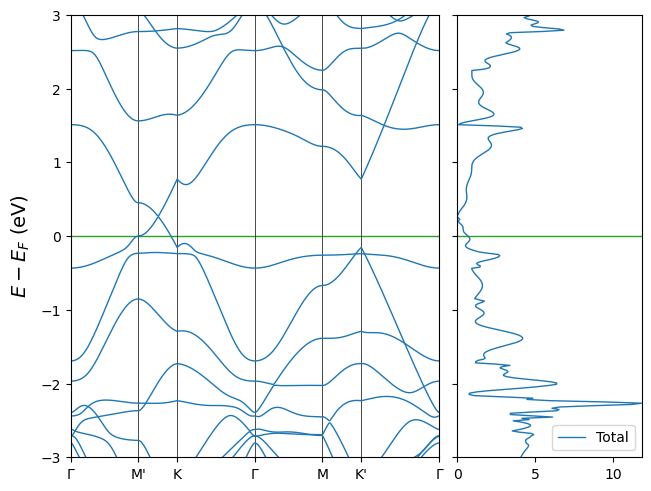

In [8]:
from CRYSTALpytools.electronics import ElectronBandDOS

es = ElectronBandDOS.from_file('es_grapheneDV.f25')
fig = es.plot(k_label=[r'$\Gamma$', "M'", 'K', r'$\Gamma$', 'M', "K'", r'$\Gamma$'],
              energy_range=[-3, 3], dos_prj=[-1], dos_label='Total')

## 'plot.plot_electron_bands' function

The `plot.plot_electron_bands()` function enables a higher-level of plotting. It accepts extendable length of 'fort.25' / 'BAND.DAT' files, or `ElectronBand` objects.

When files are used, warning message might be triggered as no screen output file is given and geometry information is not available. It is (currently) only useful when converting the object into pymatgen formats.

### Single-system band structure

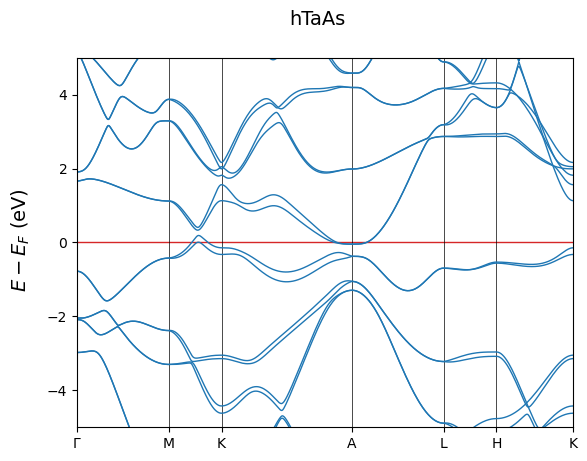

In [9]:
import CRYSTALpytools.plot as cfplt

fig = cfplt.plot_electron_bands('band_hTaAs.BAND', energy_range=[-5, 5],
                                title='hTaAs', fermi_color='tab:red',
                                k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'])

The user can customize their settings as has been shown in the previous sections. Here is another example.

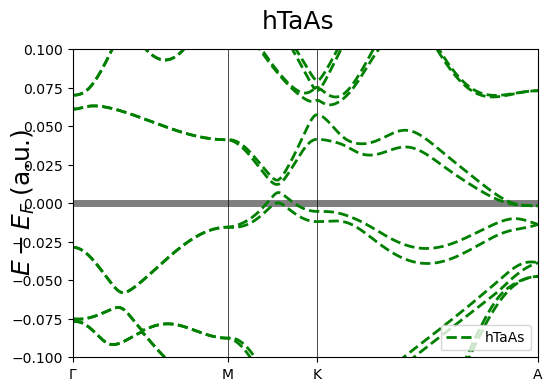

In [10]:
fig = cfplt.plot_electron_bands(
    'band_hTaAs.BAND', unit='a.u.', k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    energy_range=[-0.1, 0.1], k_range=['Gamma', 'A'],
    band_label='hTaAs', band_color='green', band_linestyle='--', band_linewidth=2,
    fermi_level=0., fermi_color='tab:gray', fermi_linestyle='-', fermi_linewidth=5,
    title='hTaAs', figsize=(6,4), fontsize=18)

### Multi-system Band Structures

With the `plot_electron_bands()` fuction you can plot multiple band structures in two ways:

- `'multi'`: Overlapping the structures  
- `'compare'`: Side by side plots

In both cases, the user can customize the plot settings just as in single-system plotting.

Here is an example of overlapped band structures of hTaAs under different pressures. Since the volume has changed, their K pathes are scaled. This is enforced when `mode='multi'`. Note here the plotting parameters should be given in lists with the same length as band structure inputs. Refer to module specific documentations for more information.

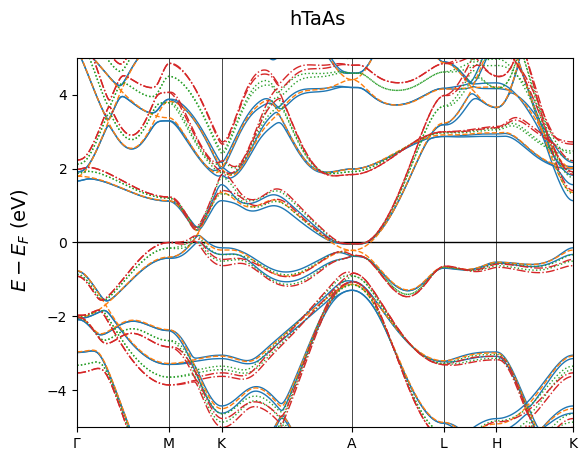

In [11]:
Data = ['band_hTaAs.BAND', 'band_hTaAs_noso.BAND',
        'band_hTaAs_P15.BAND', 'band_hTaAs_P25.BAND']

fig = cfplt.plot_electron_bands(
    *Data, mode='multi', energy_range=[-5, 5], title='hTaAs',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], fermi_color='k',
    band_label=['NOSOC', 'SCDFT', 'P15', 'P25'],
    band_linestyle=['-','--','dotted','dashdot'],
    legend=None
)

Here is an example of side-by-side plots, also customized. The displaying scheme is specified by `layout=[2, 2]`. The plotting parameters can be given in text or numbers, or 1\*2 lists for spin-polarized systems. Refer to module specific documentations for more information.

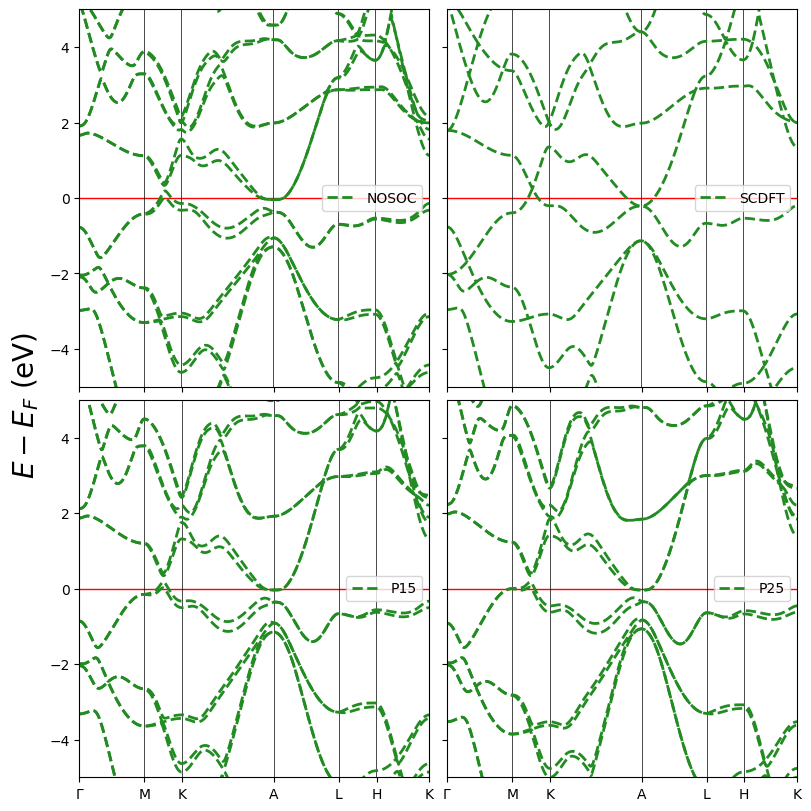

In [12]:
Data = ['band_hTaAs.BAND', 'band_hTaAs_noso.BAND',
        'band_hTaAs_P15.BAND', 'band_hTaAs_P25.BAND']

fig = cfplt.plot_electron_bands(
    *Data, mode='compare', energy_range=[-5, 5], layout=(2,2), fontsize=20,
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    band_label=['NOSOC', 'SCDFT', 'P15', 'P25'], band_color='forestgreen',
    band_linestyle='--', band_linewidth=2, fermi_color='red', figsize=(8,8),
    legend='center right'
)

## 'plot.plot_electron_doss' function

The `plot.plot_electron_doss()` function enables a higher-level of plotting. It accepts extendable length of 'fort.25' / 'DOSS.DAT' files, or `ElectronDOS` objects.

### Single-system DOS

By default a the DOS of a single system is plotted into separate subplots, depending on the number of projections.

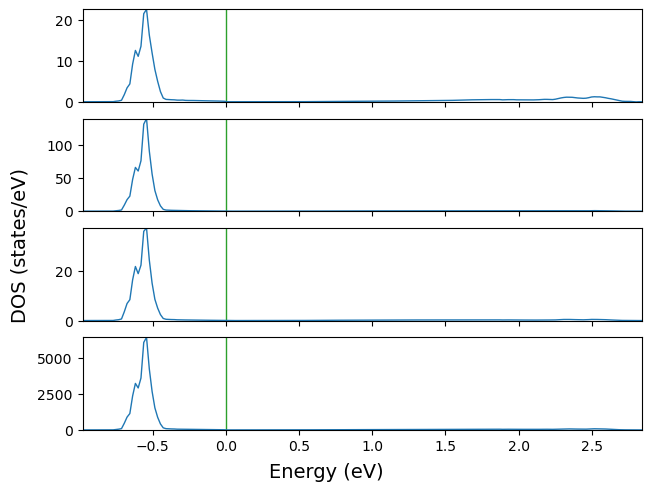

In [13]:
fig = cfplt.plot_electron_doss('doss_96.DOSS', sharey=False)

Similar to band structure, the user can customize of DOSS plots. Projections can be selected by the `plt` parameter (**It starts from 1**).

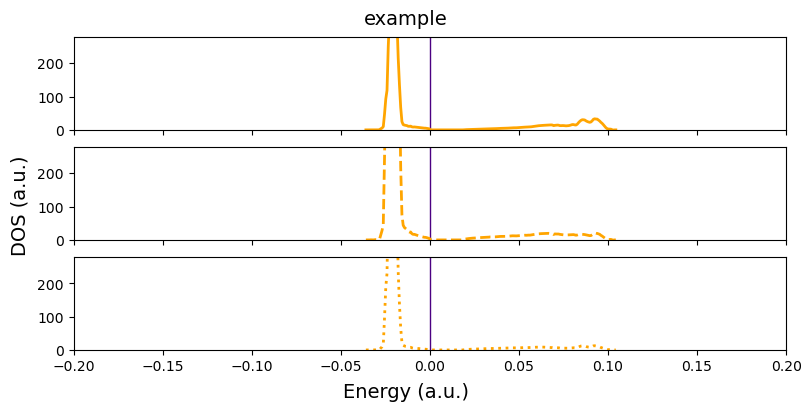

In [14]:
fig = cfplt.plot_electron_doss(
    'doss_96.DOSS', title='example', figsize=(8,4),
    energy_range=[-0.2,0.2], dos_range=[0, 280], prj=[1,2,3],
    dos_color='orange', dos_linestyle=['-','--','dotted'], dos_linewidth=2,
    unit='a.u.', fermi_level=0., fermi_color='indigo' )

With `overlap=True`, multiple projections are ploted into the same panel.

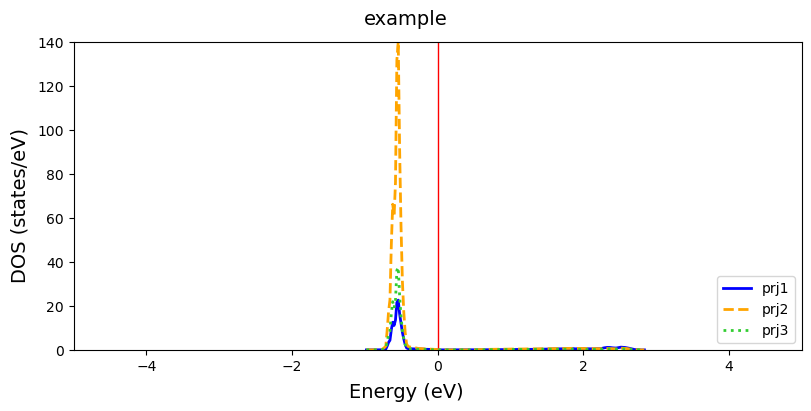

In [15]:
fig = cfplt.plot_electron_doss(
    'doss_96.DOSS', title='example', energy_range=[-5,5], prj=[1,2,3],
    overlap=True, dos_color=['blue', 'orange', 'limegreen'],
    dos_label=['prj1', 'prj2', 'prj3'],
    dos_linestyle=['-','--','dotted'], dos_linewidth=2, fermi_color='r',
    figsize=(8,4))

For spin-polarized systems, the user can either plot the $\beta$ state on the same (`beta='up'`, default) or the opposite side (`beta=down`).

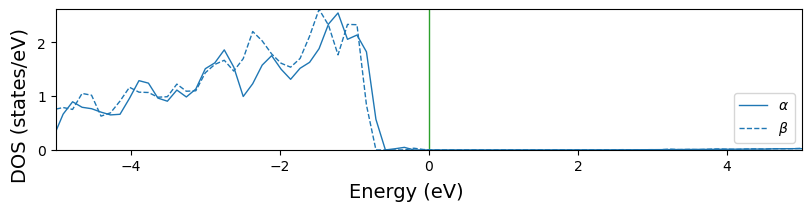

In [16]:
fig = cfplt.plot_electron_doss(
    'doss_cu.DOSS', prj=[4], figsize=(8, 2), energy_range=[-5, 5]
)

`beta='down'` and remove the legend by `legend=None`

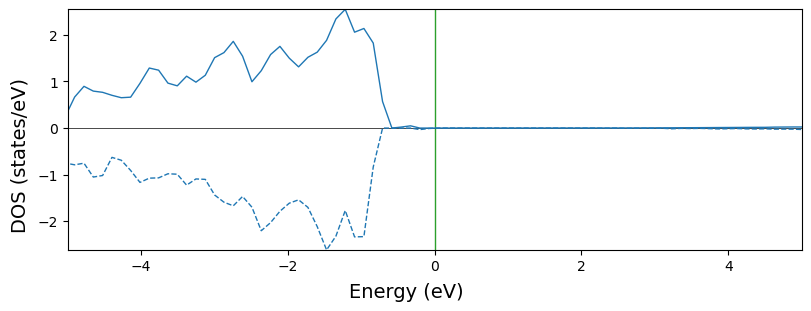

In [17]:
fig = cfplt.plot_electron_doss(
    'doss_cu.DOSS', prj=[4], figsize=(8, 3), energy_range=[-5, 5],
    beta='down', legend=None
)

Multiple projections with `overlap=True`. The default line style becomes 'solid' for $\alpha$ states and 'dashed' for $\beta$ states.

Note when the system is spin polarized, all the line setting parameters should be nPrj\*2 lists. The first entry for $\alpha$ states and the second for $\beta$ states. If 1D lists are given, the same style is used for both states. Therefore, it is not suggested to change `dos_linestyle` with 1D lists. 

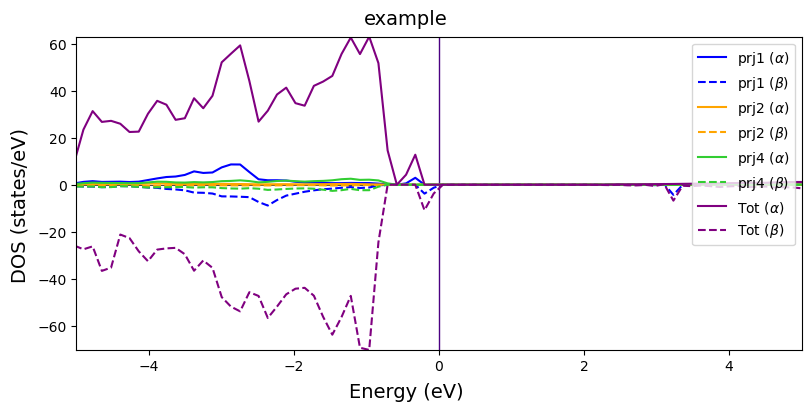

In [18]:
fig = cfplt.plot_electron_doss(
    'doss_cu.DOSS', title='example', figsize=(8, 4), energy_range=[-5, 5],
    fermi_color='indigo', overlap=True, beta='down', dos_linewidth=1.5,
    dos_color=['blue', 'orange', 'limegreen', 'purple'],
    dos_label=['prj1', 'prj2', 'prj4', 'Tot'], prj=[1,2,4,5], legend='upper right'
)

### Multi-system DOSs

DOS of multiple systems can also be plotted with `plot_electron_doss()`. Every system is plotted into a subplot with their projections overlapped. The custimization settings applies to all the systems, so make sure that all the entries have the same number of projections.

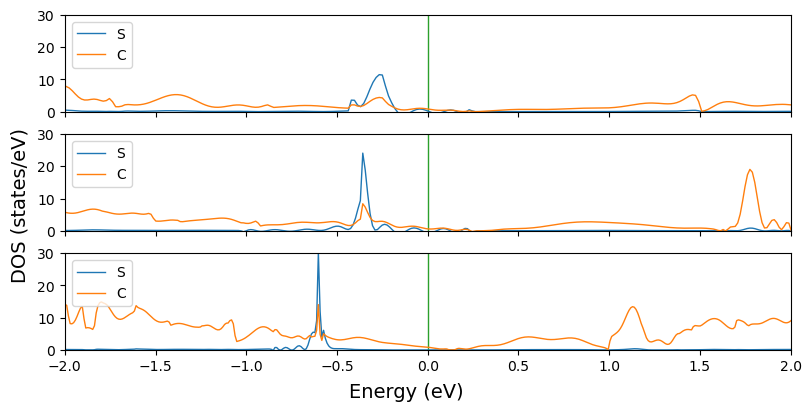

In [19]:
data = ['doss_grapheneDV4.DOSS',
        'doss_grapheneDV5.DOSS',
        'doss_grapheneDV8.DOSS']
fig = cfplt.plot_electron_doss(
    *data, figsize=(8, 4), prj=[1, 2], energy_range=[-2, 2], dos_range=[0, 30],
    dos_label=['S', 'C'], legend='upper left'
)

## 'plot.plot_electron_banddos' function

The `plot.plot_electron_banddos()` function helps to plot combined band structure - vertical DOS plots for electron structure analysis. It only accepts single-system band and DOS plots.

For inputs, it accepts 2 entries with the first one for band ('fort.25'/'BAND.DAT'/`ElectronBand`) and the second for DOS ('fort.25'/'DOSS.DAT'/`ElectronDOS`). Alternatively it also accepts 1 entry of a combined 'fort.25' (as shown in previous sections) or a `ElectronBandDOS` object.

### Overlapped DOS

While only one band is plotted on the left, multiple projections of DOS can be plotted on the right. Projections can be specified with `dos_prj` and range can be specified with `dos_range`.

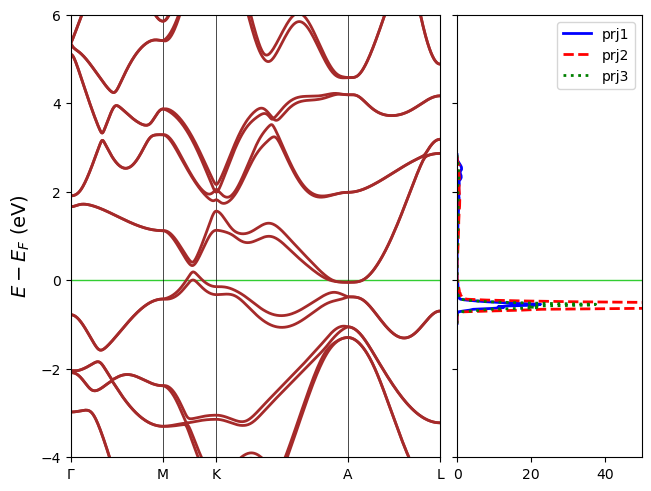

In [20]:
fig = cfplt.plot_electron_banddos(
    'band_hTaAs.BAND', 'doss_96.DOSS',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], k_range=['Gamma', 'L'],
    dos_overlap=True, dos_linewidth=2, dos_range=[0, 50],
    dos_linestyle=['-', '--', 'dotted'],
    dos_label=['prj1', 'prj2', 'prj3'], dos_prj=[1,2,3],
    dos_color=['blue', 'red', 'green'],
    band_color='brown', band_linestyle='-', band_linewidth=2,
    fermi_color='limegreen', energy_range=[-4,6],
    legend='upper right'
)

### Multi-panel DOS

DOS projections can also be plotted in separate panels. In that sense `dos_overlap=False`. In case that the figure is too long, `band_width` can be set to control the width of the band panel in times of a DOS panel.

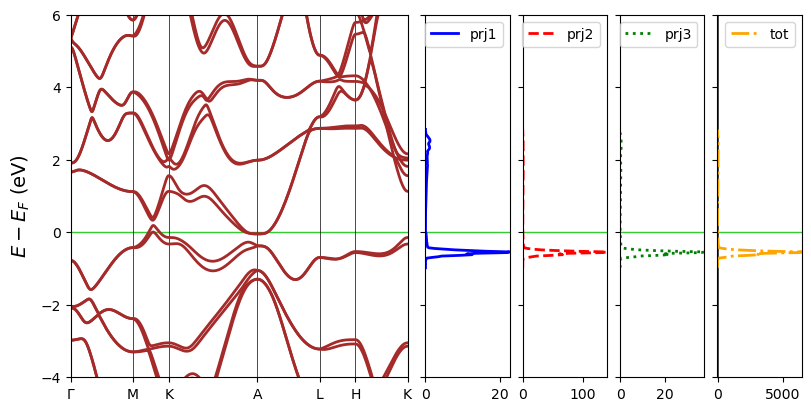

In [21]:
fig = cfplt.plot_electron_banddos(
    'band_hTaAs.BAND', 'doss_96.DOSS',
    k_label=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'],
    dos_overlap=False, dos_linewidth=2,
    dos_linestyle=['-', '--', 'dotted', 'dashdot'],
    dos_label=['prj1', 'prj2', 'prj3', 'tot'],
    dos_color=['blue', 'red', 'green', 'orange'],
    band_width=4, band_color='brown', band_linestyle='-', band_linewidth=2,
    fermi_color='limegreen', energy_range=[-4,6], figsize=(8,4),
    legend='upper right'
)

For more details, please refer to [API documentations](../../docs_source/crystalpytools.electronics.rst).